<a href="https://colab.research.google.com/github/Asjal-Git/DevelopersHub_Tasks/blob/main/Task-2_Predict_Future_Stock_Prices_(Short_Term).ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [52]:
#Import all required libraries:
import yfinance as yf
import pandas as pd
import matplotlib.pyplot as plt

from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error

In [53]:
#Selecting Apple stock and loading historical data:
# ticker = 'AAPL'
# data = yf.download(ticker, start='2015-01-01', end='2020-12-31')
# display(data.head())

In [54]:
#Selecting NVIDIA stock and loading historical data for the past 5 years:
ticker = 'NVDA'
data = yf.download(ticker, period='2y')
display(data.head())

/tmp/ipython-input-54-3157607934.py:3: FutureWarning: YF.download() has changed argument auto_adjust default to True
  data = yf.download(ticker, period='2y')
[*********************100%***********************]  1 of 1 completed


Price,Close,High,Low,Open,Volume
Ticker,NVDA,NVDA,NVDA,NVDA,NVDA
Date,,,,,
2023-06-26,40.607018,42.737707,40.075343,42.434892,594322000
2023-06-27,41.850246,41.914206,40.423127,40.773909,462175000
2023-06-28,41.091717,41.819270,40.493086,40.634997,582639000
2023-06-29,40.796886,41.574408,40.575023,41.532434,380514000
2023-06-30,42.275982,42.523830,41.475476,41.654367,501148000


In [55]:
#Predicting the next close price:
data['Next Close Price'] = data['Close'].shift(-1)

In [56]:
print(data.iloc[-1])

Price             Ticker
Close             NVDA      1.534219e+02
High              NVDA      1.540100e+02
Low               NVDA      1.492800e+02
Open              NVDA      1.493100e+02
Volume            NVDA      1.999173e+08
Next Close Price                     NaN
Name: 2025-06-25 00:00:00, dtype: float64


In [57]:
#Removing the last row because it has NaN in Next Close Price
data = data[:-1]

## Prepare the data

### Subtask:
Define the features (Open, High, Low, Volume) and the target variable (Next Close Price). Remove any rows with missing values.


In [58]:
features = ['Open', 'High', 'Low', 'Volume']
target = 'Next Close Price'
X = data[features]
y = data[target]

# Drop rows with missing values from both X and y simultaneously
combined_data = pd.concat([X, y], axis=1).dropna()

# Access columns using the MultiIndex
X = combined_data[[(feature, 'NVDA') for feature in features]]
y = combined_data[target]


# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

## Create and train the model




In [59]:
#Train a linear regression model
model = LinearRegression()
model.fit(X_train, y_train)

LinearRegression()

## Evaluate the model

### Subtask:
Predict the next close price on the test set and evaluate the model's performance using a metric like Mean Squared Error.


In [60]:
#Predict the closing prices on the test data:
predicted_prices = model.predict(X_test)

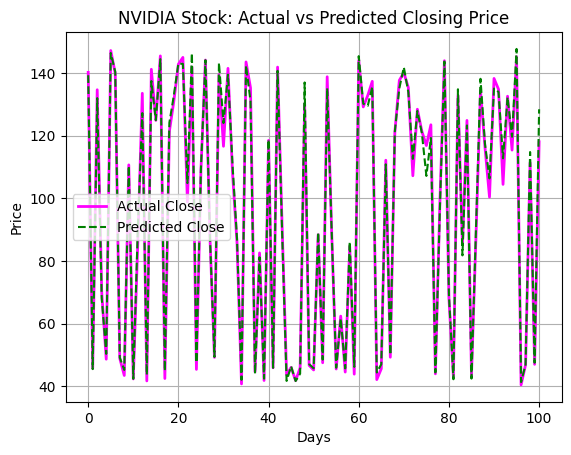

In [61]:
#Plotting actual vs predicted closing prices:
plt.plot(y_test.values, label='Actual Close', color='magenta', linewidth=2)
plt.plot(predicted_prices, label='Predicted Close', color='green', linestyle='--')
plt.title('NVIDIA Stock: Actual vs Predicted Closing Price')
plt.xlabel('Days')
plt.ylabel('Price')
plt.legend()
plt.grid(True)
plt.show()


In [62]:
y_pred = model.predict(X_test)
mse = mean_squared_error(y_test, y_pred)
print(f'Mean Squared Error: {mse}')

Mean Squared Error: 8.42792670883022
